## Prediction of Gout from patient's Chief Complaint Corpa

### Is this patient potentially in need of treatment for Gout?

## Import Data
#### The data is found in the MIMIC-III (Medical Information Mart for Intensive Care III) database.  Details can be found at https://physionet.org/content/emer-complaint-gout/1.0/.   Acces to the database may be requested at (https://mimic.physionet.org/gettingstarted/access/).  The data is contained in 2 csv files from years 2019 and 2020.

In [1]:
import pickle
import pandas as pd
from ast import literal_eval
df = pd.read_pickle("modeling.csv")
print(type(df['corpus']))

<class 'pandas.core.series.Series'>


In [2]:
df

,corpus,target
0,feel bad last week switch bp medic last week w...,N
1,cant walk report onset orient aortic valv repl...,Y
2,dehydr chest hurt hip hurt cramp pmh hip repla...,Y
3,gout flare l arm swell x week deni pmh,Y
4,heart racingdyspnea orthopnea get wors last da...,N
...,...,...
8432,step nail home right foot pain difficult walk ...,N
8433,breakdown rt stress depress,N
8434,tri jump front car pt state psych med pmh arth...,N
8435,abdomin pain x week deni pmh,N


### Split data for testing and validation (test)

In [3]:
target = df.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['corpus'], target, test_size=0.33, random_state=55)

In [5]:
print(X_train)

1445    pt struck face last night concern nasal fx tak...
3301    pt co continu pain rt superfici peron nerv ent...
7325    pt slip shoer head lac loc withdraw heroinlast...
5011                                        abd cramp day
3300    pt co bite right upper arm spread right lower ...
                              ...                        
2652                nv weak ha lighthead x day pmh dm chf
5591                                       flulik symptom
6308    pt co avh state kill son yesterday tri kill pt...
1010          near syncop palpit min pta hx copd gerd hcv
4854                                       si plan od mva
Name: corpus, Length: 5546, dtype: object


### Tf-idf vectorization

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


['aa', 'aaa', 'aain', 'ab', 'abandon', 'abcess', 'abcessknot', 'abd', 'abdback', 'abdcess']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


*** Perform Naive Bayes Modeling ***

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)
pred = nb_classifier.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(score)

0.9849981705085986


In [8]:
# Plots confusion matrix of model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion(y_test, pred):
    mat = confusion_matrix(y_test, pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true')
    plt.ylabel('predicted')

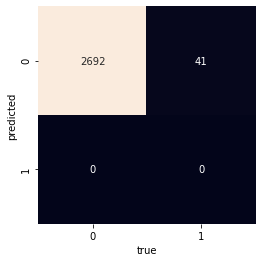

In [9]:
plot_confusion(y_test, pred)
plt.show()

*** Above we see the results are skewed due to imbalanced data, below I use Over Sampling to balance the data prior to running the model.  

In [10]:
import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(tfidf_train, y_train)
pd.DataFrame(tfidf_test.todense(), columns=tfidf_vectorizer.get_feature_names())

,aa,aaa,aain,ab,abandon,abcess,abcessknot,abd,abdback,abdcess,...,zip,zofran,zoloft,zone,zpack,zpak,zquil,zyprexa,zyrtec,zyrtecd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print(y_ROS.value_counts())

Y    5476
N    5476
Name: target, dtype: int64


### Run Nultinomial Naive Bayes Prediction

In [12]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_ROS, y_ROS)
pred = nb_classifier.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(score)

0.9612147822905233


### Confusion Matrix: 0=Gout, 1 = non-Gout
#### Below is seen 0 false negatives, 27 False Positive

In [13]:
# Plots confusion matrix of model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion(y_test, pred):
    mat = confusion_matrix(y_test, pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true')
    plt.ylabel('predicted')

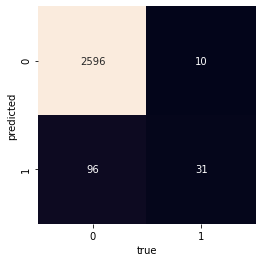

In [14]:
plot_confusion(y_test, pred)
plt.show()

*** Better but still could improve - will tune hyper parameter "alpha" ***"

### Tune model: testing 'alpha' hyper parameter

In [15]:
# Create the list of alphas: alphas
import numpy as np
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(X_ROS, y_ROS)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.9806073911452616

Alpha:  0.1
Score:  0.9784120014635931

Alpha:  0.2
Score:  0.9754848152213684

Alpha:  0.30000000000000004
Score:  0.9747530186608123

Alpha:  0.4


/opt/anaconda3/envs/mimicnlp/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Score:  0.9740212221002561

Alpha:  0.5
Score:  0.9710940358580314

Alpha:  0.6000000000000001
Score:  0.9685327478960849

Alpha:  0.7000000000000001
Score:  0.9659714599341384

Alpha:  0.8
Score:  0.964873765093304

Alpha:  0.9
Score:  0.9626783754116356



***The Alpha, 0, provides the highest accuracy score, using this alpha to build the model results in 98% accuracy scoring***

In [16]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB(alpha=0.1)

# Fit the classifier to the training data
nb_classifier.fit(X_ROS, y_ROS)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

0.9784120014635931


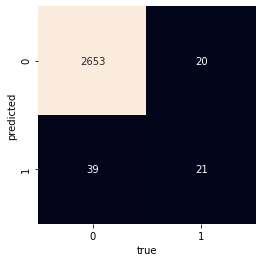

In [17]:
plot_confusion(y_test, pred)
plt.show()

*** Tuning the alpha resulted in a more balanced result, the number of false negatives dropped to 39 from 96 but at the cost of doubling false positives, let's see if adding weight to the imbalanced class in a logistic regression gives better results rather than using the oversampling technique. ***

### Run LR model without hyperparameter tuning

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
weights = {0:1000,1:100}
lg = LogisticRegression(random_state=13, class_weight='balanced')
# fit it
lg.fit(tfidf_train,y_train)
# test
y_pred = lg.predict(tfidf_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')

Accuracy Score: 0.9897548481522137


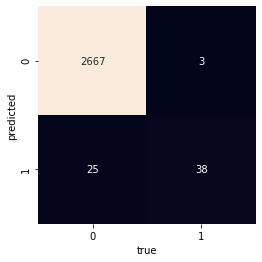

In [19]:
plot_confusion(y_test, y_pred)
plt.show()

*** Clearly an improvement just using LR, let's see what happens with weights ***

In [20]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000}]
param_grid = dict(class_weight=w)

In [21]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
Y = y_train.copy(deep=True)
Y = label_encoder.fit_transform(Y)  # encode
Y = np.ravel(Y)                     # reshape

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lg3 = LogisticRegression(random_state=13)
grid = GridSearchCV(lg3, param_grid = param_grid, scoring="accuracy", cv=cv, n_jobs=-1, refit=True)


grid.fit(tfidf_train, Y)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(random_state=13), n_jobs=-1,
             param_grid={'class_weight': [{0: 1000, 1: 100}, {0: 1000, 1: 10},
                                          {0: 1000, 1: 1.0}, {0: 500, 1: 1.0},
                                          {0: 400, 1: 1.0}, {0: 300, 1: 1.0},
                                          {0: 200, 1: 1.0}, {0: 150, 1: 1.0},
                                          {0: 100, 1: 1.0}, {0: 99, 1: 1.0},
                                          {0: 10, 1: 1.0}, {0: 0.01, 1: 1.0},
                                          {0: 0.01, 1: 10}, {0: 0.01, 1: 100},
                                          {0: 0.001, 1: 1.0},
                                          {0: 0.005, 1: 1.0}, {0: 1.0, 1: 1.0},
                                          {0: 1.0, 1: 0.1}, {0: 10, 1: 0.1},
                                          {0: 100, 1: 0.1}, {0: 10, 1: 0.01},
 

In [23]:
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9944700295963834 with param: {'class_weight': {0: 100, 1: 1000}}


In [24]:
lg = LogisticRegression(random_state=13, class_weight=[{0:100,1:1000}])
# fit it
lg.fit(tfidf_train,y_train)
# test
y_pred = lg.predict(tfidf_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')

Accuracy Score: 0.9897548481522137


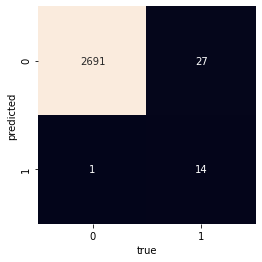

In [25]:
plot_confusion(y_test, y_pred)
plt.show()

### There is an interesting change in the confusion matrix, the no of false negatives is increased, false positives decreased to 1.  The tuning the weights can be used to reduce false positives. 